In [1]:
%config Completer.use_jedi = False

# Problem 6: Random Forest for Tabular Data

In [61]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [27]:
df = pd.read_csv('./data/petrol_consumption.csv')

In [28]:
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


### Split the dataset

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X = df.drop('Petrol_Consumption', axis=1)
y = df['Petrol_Consumption']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Scale the dataset

In [41]:
from sklearn.preprocessing import StandardScaler

In [44]:
scaler = StandardScaler()

In [45]:
X_train = scaler.fit_transform(X_train)

In [46]:
X_test = scaler.transform(X_test)

### Train the model

In [47]:
from sklearn.ensemble import RandomForestRegressor

In [48]:
rf = RandomForestRegressor()

In [49]:
rf.fit(X_train, y_train)

RandomForestRegressor()

In [51]:
def r_mse(pred,y): return round(math.sqrt(((pred-y)**2).mean()), 6)

In [56]:
y_pred = np.stack([t.predict(X_test) for t in rf.estimators_])

In [59]:
r_mse(y_pred.mean(0), y_test)

190.580745

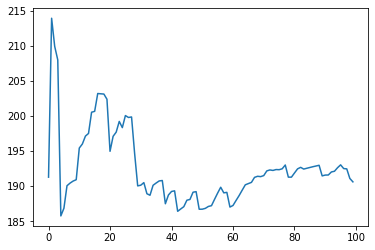

In [65]:
plt.plot([r_mse(y_pred[:i+1].mean(0), y_test) for i in range(100)])